In [1]:
%matplotlib inline
%matplotlib notebook

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


sns.set({'figure.figsize': (14, 13)})

# Dataset from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
df = pd.read_csv('../../datasets/bcw/bcw.csv').dropna()
del df['id']

df = df[~(df == '?').any(axis=1)]  # remove '?'-d data rows

y = df['Class'].values
del df['Class']
X = df.values

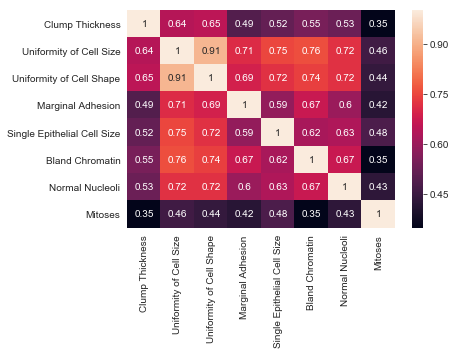

In [2]:
sns.heatmap(df.corr().round(2), annot=True)

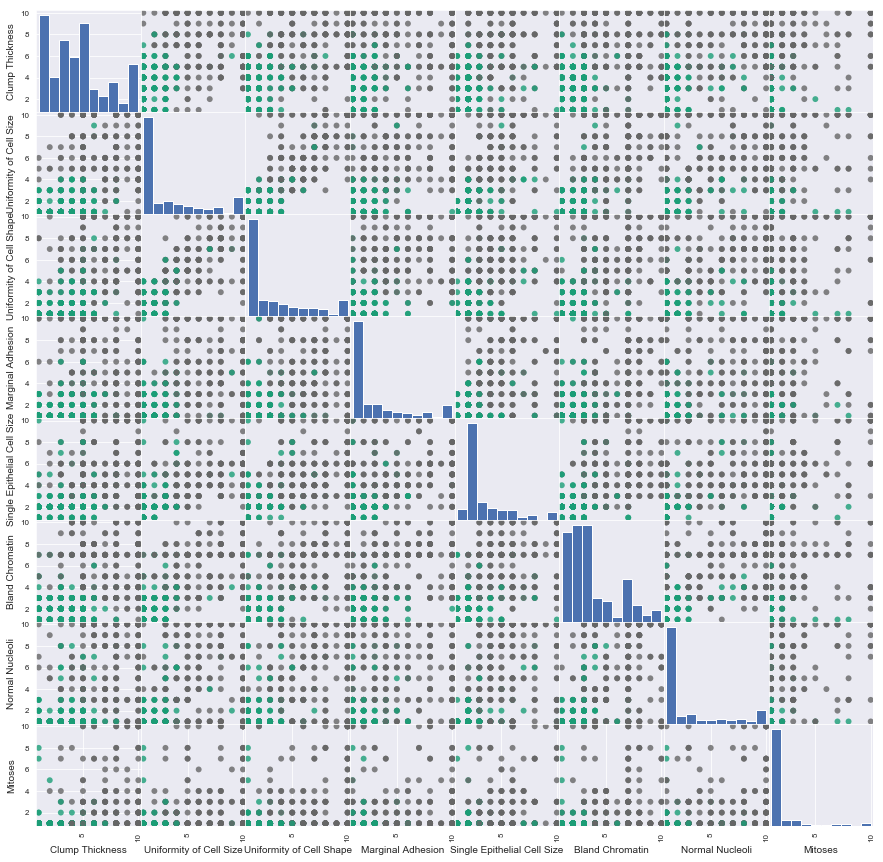

In [3]:
pd.plotting.scatter_matrix(df, c=y, alpha=.8, marker='o', s=35, figsize=(15, 15,), cmap='Dark2');

In [7]:
from sklearn.neural_network import MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

model = MLPClassifier(
    hidden_layer_sizes=(450,),
    alpha=0.0001,
    activation='relu',
    learning_rate_init=.0025,
    max_iter=1000,
    shuffle=True,
    random_state=1
)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

print('Accuracy on train', np.mean(y_train == y_pred_train))
print('Accuracy on test: ', np.mean(y_test == y_pred_test))

Accuracy on train 0.9981684981684982
Accuracy on test:  0.9854014598540146
